In [132]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

# Standard Conditions

In [133]:
inchHg= 29.03 # inch Hg for calculating pressure
inchTOm = 25.4 * 1e-3 # inch to m conversion
T = 23.01 + 273.15 # K
g = 9.81 # m/s^2 gravity
R = 287.05 # J/(kg K) specific gas constant of air

# desnity from temperature calculation
rho_Hg = 13595 # kg/m^3 density of mercury
rho_H2O = 1000 # kg/m^3 density of water

P0 =  rho_Hg * g * inchHg * inchTOm # Pa
print(f"The Atmospheric Pressure is {P0} Pa")

# density of air calculation
rho_air = P0 / (R * T) # kg/m^3
print(f"The density of air is {rho_air} kg/m^3")

The Atmospheric Pressure is 98339.7209859 Pa
The density of air is 1.1567646786478845 kg/m^3


In [134]:
oriface_diameter = 17.47 * 1e-3 # mm to m
oriface_area = np.pi * oriface_diameter**2 / 4 # m^2

pipe_area = 10 * oriface_area # ?
print(f"The area of the oriface is {oriface_area} m^2")

# flow rate calculation
Cd = 0.62
def calc_mass_flow_rate(dh):
    dp = rho_H2O * g * dh
    rA = oriface_area / pipe_area
    Q = Cd * oriface_area * np.sqrt(2 * dp / (rho_air)) 
    return rho_air * Q

C1_dh_oriface = 13.2 - 9.6
C2_dh_oriface = 13.7 - 8.8
C3_dh_oriface = 13.7 - 8.8
C4_dh_oriface = 13.7 - 8.8

C1_md = calc_mass_flow_rate(C1_dh_oriface * 1e-2)
C2_md = calc_mass_flow_rate(C2_dh_oriface * 1e-2)
C3_md = calc_mass_flow_rate(C3_dh_oriface * 1e-2)
C4_md = calc_mass_flow_rate(C4_dh_oriface * 1e-2)

print(f"The flow rate for C1 is {C1_md} kg/s")
print(f"The flow rate for C2 is {C2_md} kg/s")
print(f"The flow rate for C3 is {C3_md} kg/s")
print(f"The flow rate for C4 is {C4_md} kg/s")


The area of the oriface is 0.00023970422632724826 m^2
The flow rate for C1 is 0.004248060001704497 kg/s
The flow rate for C2 is 0.00495607000198858 kg/s
The flow rate for C3 is 0.00495607000198858 kg/s
The flow rate for C4 is 0.00495607000198858 kg/s


# Static Pressure graph

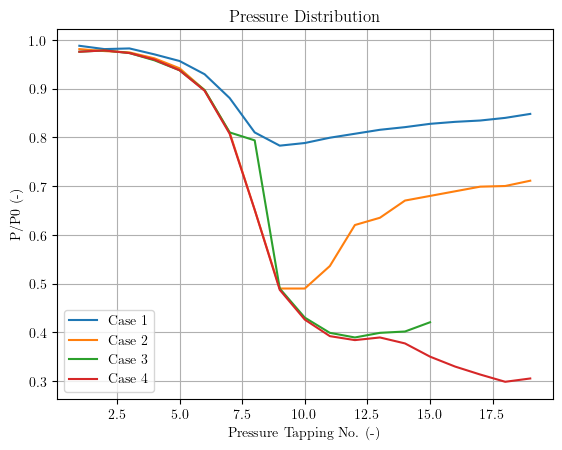

In [135]:
def get_rp(tab):
    dh = (tab[:,2] - tab[:,1]) * 1e-2 # m
    p = P0 - rho_Hg * g * dh

    return p / P0

C1 = np.loadtxt('case1.txt', skiprows=1)
C1_rp = get_rp(C1)
C2 = np.loadtxt('case2.txt', skiprows=1)
C2_rp = get_rp(C2)
C3 = np.loadtxt('case3.txt', skiprows=1)
C3_rp = get_rp(C3)
C4 = np.loadtxt('case4.txt', skiprows=1)
C4_rp = get_rp(C4)

C3_SHOCK_LOCATION = 15

fig,ax = plt.subplots()
x = C1[:,0]
ax.plot(x, C1_rp, label='Case 1')
ax.plot(x, C2_rp, label='Case 2')
ax.plot(x[:C3_SHOCK_LOCATION], C3_rp[:C3_SHOCK_LOCATION] , label='Case 3')
ax.plot(x, C4_rp, label='Case 4')

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('P/P0 (-)')
plt.title('Pressure Distribution')
plt.legend()
plt.grid()
plt.show()

# Mach number graph

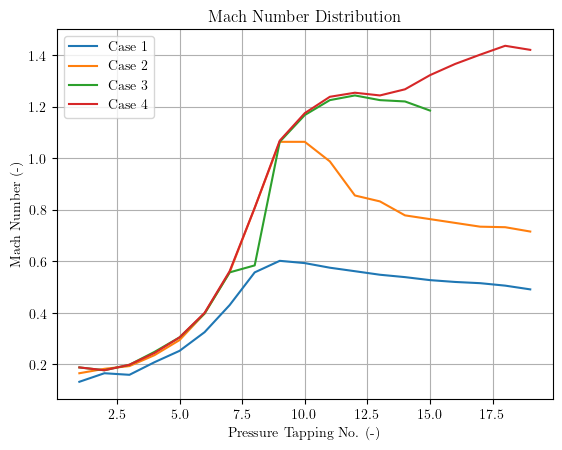

In [136]:

def calc_M(rp):
    # calc mach number from pressure ratio
    g = 1.4
    M2 = (rp ** -((g-1)/g) - 1) * 2 / (g - 1)
    return np.sqrt(M2)

C1_M = calc_M(C1_rp)
C2_M = calc_M(C2_rp)
C3_M = calc_M(C3_rp)
C4_M = calc_M(C4_rp)

fig,ax = plt.subplots()
ax.plot(C1[:,0], C1_M, label='Case 1')
ax.plot(C2[:,0], C2_M, label='Case 2')
ax.plot(C3[:C3_SHOCK_LOCATION,0], C3_M[:C3_SHOCK_LOCATION], label='Case 3')
ax.plot(C4[:,0], C4_M, label='Case 4')

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Mach Number (-)')
plt.title('Mach Number Distribution')
plt.legend()
plt.grid()
plt.show()


# Continuation of Case 3 from shock location

The Mach Number before the shock is 1.3649572840924917
The Mach Number after the shock is 0.7549452700154634
The stagnant pressure ratio P0s/P0 is 0.9664805580051687
Exact nozzil location is 8.761132672881356


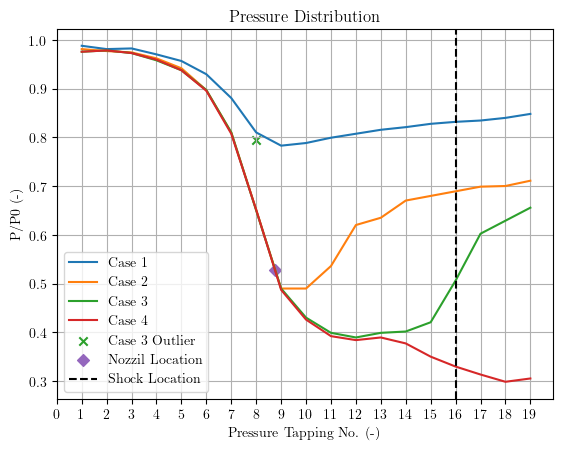

In [137]:

def Ms_from_M(M):
    g = 1.4
    return np.sqrt((1 + (g - 1) / 2 * M**2) / (g * M**2 - (g - 1) / 2))

def rP0s_from_M(M):
    g = 1.4
    return (((g + 1) / 2 * M**2) / (1 + (g - 1) / 2 * M **2)) ** (g / (g - 1)) * (2 * g / (g + 1) * M**2 - (g - 1) / (g + 1)) ** - (1 / (g - 1))


MachNo_before_shock = C4_M[C3_SHOCK_LOCATION]
print(f"The Mach Number before the shock is {MachNo_before_shock}")
MachNo_after_shock = Ms_from_M(MachNo_before_shock)
print(f"The Mach Number after the shock is {MachNo_after_shock}")

rPs = rP0s_from_M(MachNo_before_shock)

print(f"The stagnant pressure ratio P0s/P0 is {rPs}")

C3_rp_corrected = C3_rp.copy()
C3_rp_corrected[C3_SHOCK_LOCATION + 1:] /= rPs

C3_rp_corrected[7] = (C3_rp_corrected[6] + C3_rp_corrected[8]) / 2

fig,ax = plt.subplots()
ax.plot(C1[:,0], C1_rp, label='Case 1')
# add error bars
ax.plot(C2[:,0], C2_rp, label='Case 2')
#ax.plot(C3[:,0], C3_rp, label='Case 3')
ax.plot(C3[:,0], C3_rp_corrected, label='Case 3')
ax.plot(C4[:,0], C4_rp, label='Case 4')
ax.scatter(C3[7,0], C3_rp[7], label='Case 3 Outlier', color='C2', marker='x')

# find nozzil location
def lerp(x1, x2, y1, y2, x):
    return (y2 - y1) / (x2 - x1) * (x - x1) + y1

def find_nozzil_location(rp, x, y):
    for i in range(len(rp)):
        if rp[i] < 0.5283:
            break
    # linear interpolation
    return lerp(rp[i], rp[i-1], x[i], x[i-1], 0.5283)

exact_nozzil_location = find_nozzil_location(C3_rp_corrected, C3[:,0], C3_rp_corrected)
print(f"Exact nozzil location is {exact_nozzil_location}")
NOZZIL_LOCATION = np.ceil(exact_nozzil_location) - 1

ax.scatter(exact_nozzil_location, 0.5283, label='Nozzil Location', marker='D', c='C4')
ax.axvline(C3_SHOCK_LOCATION + 1, label='Shock Location', c='black', linestyle='--')

plt.xticks(np.arange(0, 20, 1))

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('P/P0 (-)')
plt.title('Pressure Distribution')
plt.grid()
plt.legend()

plt.savefig('pressure_ratio_distribution_corrected.png', dpi=300)
plt.show()

# Corrected Mach Diagram

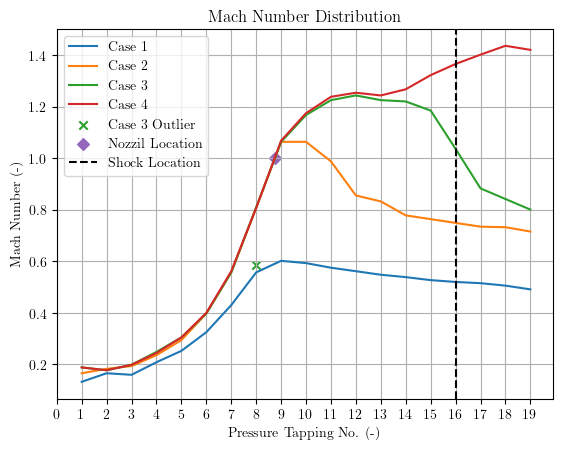

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [138]:

C3_M_corrected = calc_M(C3_rp_corrected)

fig,ax = plt.subplots()
ax.plot(C1[:,0], C1_M, label='Case 1')
ax.plot(C2[:,0], C2_M, label='Case 2')
#ax.plot(C3[:,0], C3_M, label='Case 3')
ax.plot(C3[:,0], C3_M_corrected, label='Case 3')
ax.plot(C4[:,0], C4_M, label='Case 4')
ax.scatter(C3[7,0], C3_M[7], label='Case 3 Outlier', color='C2', marker='x')
ax.scatter(exact_nozzil_location, 1.0, label='Nozzil Location', marker='D', c='C4')
ax.axvline(C3_SHOCK_LOCATION + 1, label='Shock Location', c='black', linestyle='--')


plt.xticks(np.arange(0, 20, 1))

plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Mach Number (-)')
plt.title('Mach Number Distribution')
plt.legend()
plt.grid()
plt.savefig('mach_number_distribution_corrected.png', dpi=300)
plt.show()

print(f"CASE 1 The Mach Number at the nozzle and exit are {C1_M[NOZZIL_LOCATION]:.3f} and {C1_M[-1]:.3f}")
print(f"CASE 2 The Mach Number at the nozzle and exit are {C2_M[NOZZIL_LOCATION]:.3f} and {C2_M[-1]:.3f}")
print(f"CASE 3 The Mach Number at the nozzle and exit are {C3_M_corrected[NOZZIL_LOCATION]:.3f} and {C3_M_corrected[-1]:.3f}")
print(f"CASE 4 The Mach Number at the nozzle and exit are {C4_M[NOZZIL_LOCATION]:.3f} and {C4_M[-1]:.3f}")

$0.32x^0+-0.48x^1+0.45x^2+-0.20x^3+0.05x^4+-0.01x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$
$1.38x^0+-2.64x^1+2.08x^2+-0.80x^3+0.17x^4+-0.02x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$
$1.39x^0+-2.56x^1+1.96x^2+-0.74x^3+0.16x^4+-0.02x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$
$1.01x^0+-1.71x^1+1.28x^2+-0.47x^3+0.10x^4+-0.01x^5+0.00x^6+-0.00x^7+0.00x^8+-0.00x^9$


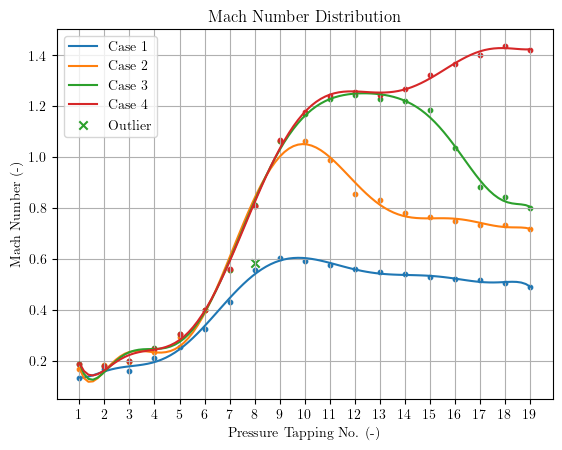

In [ ]:

def plot_polyfit(ax, x, y, max_deg, label):

    residuals = []
    for deg in range(max_deg):
        coeff = np.polyfit(x, y, deg)
        p = np.poly1d(coeff)
        xp = np.linspace(x[0], x[-1], 100)
        residual = np.sum((p(x) - y) ** 2)
        residuals.append(residual)

    best_deg = np.argmin(residuals) + 1
    coeff = np.polyfit(x, y, best_deg)
    p = np.poly1d(coeff)
    xp = np.linspace(x[0], x[-1], 100)
    # make tex label
    tex = [f"{c:.2f}x^{i}" for i,c in enumerate(coeff[::-1])]
    tex = '$' + '+'.join(tex) + '$'
    print(tex)
    ax.plot(xp, p(xp), label=label)

fig,ax = plt.subplots()

plt.xticks(np.arange(0, 20, 1))

max_deg = 9
plot_polyfit(ax, C1[:,0], C1_M, max_deg, 'Case 1')
ax.scatter(C1[:,0], C1_M, color='C0', s=10)
plot_polyfit(ax, C2[:,0], C2_M, max_deg, 'Case 2')
ax.scatter(C2[:,0], C2_M, color='C1', s=10)
plot_polyfit(ax, C3[:,0], C3_M_corrected, max_deg, 'Case 3')
ax.scatter(C3[:,0], C3_M_corrected, color='C2', s=10)
plot_polyfit(ax, C4[:,0], C4_M, max_deg, 'Case 4')
ax.scatter(C4[:,0], C4_M, color='C3', s=10)

ax.scatter(C3[7,0], C3_M[7], label='Outlier', color='C2', marker='x')


plt.xlabel('Pressure Tapping No. (-)')
plt.ylabel('Mach Number (-)')
plt.title('Mach Number Distribution')
plt.legend()
plt.grid()
plt.savefig('mach_number_distribution_corrected_polyfit.png', dpi=300)

# not great results

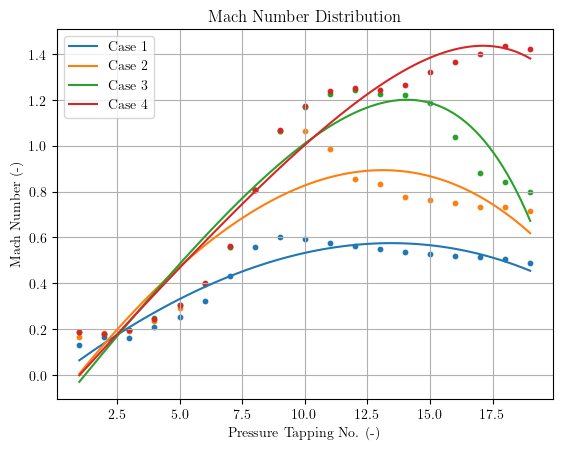

In [ ]:
from scipy.optimize import curve_fit

def f(x, a, b, c, d):
    return a + b * x - c * np.exp(-d * x)

def plot_curve_fit(ax, f, x, y, label):
    popt, pcov = curve_fit(f, x, y)
    xp = np.linspace(x[0], x[-1], 100)
    ax.plot(xp, f(xp, *popt), label=label)

fig,ax = plt.subplots()

plot_curve_fit(ax, f, C1[:,0], C1_M, 'Case 1')
ax.scatter(C1[:,0], C1_M, color='C0', s=10)
plot_curve_fit(ax, f, C2[:,0], C2_M, 'Case 2')
ax.scatter(C2[:,0], C2_M, color='C1', s=10)
plot_curve_fit(ax, f, C3[:,0], C3_M_corrected, 'Case 3')
ax.scatter(C3[:,0], C3_M_corrected, color='C2', s=10)
plot_curve_fit(ax, f, C4[:,0], C4_M, 'Case 4')
ax.scatter(C4[:,0], C4_M, color='C3', s=10)

ax.set_xlabel('Pressure Tapping No. (-)')
ax.set_ylabel('Mach Number (-)')
ax.set_title('Mach Number Distribution')
ax.legend()
ax.grid()

plt.show()


# terrible go back to original polyfit